# Particle Swarm Optimization (PSO) Algorithm

## Introduction

Particle Swarm Optimization (PSO) is a nature-inspired optimization algorithm that belongs to the class of swarm intelligence techniques. It was originally introduced by Dr. James Kennedy and Dr. Russell Eberhart in 1995, inspired by the social behavior of birds and fish.

PSO is commonly used for solving optimization problems, especially in the context of function optimization and searching for the global optimum in a multidimensional space.

## Basic Concept

The algorithm is based on the idea of simulating the social behavior of a group of individuals, called particles, as they move through the solution space. Each particle represents a potential solution to the optimization problem. The collective movement of particles is guided by their individual experiences and the global best solution found by any particle in the swarm.

## Algorithm Workflow

1. **Initialization:**
   - Initialize a population of particles with random positions and velocities in the solution space.
   - Evaluate the fitness of each particle based on the objective function.

2. **Update Particle Velocity and Position:**
   - Update the velocity and position of each particle based on its previous velocity, position, and the best positions found by itself and the entire swarm.
   - The new velocity and position are updated using the following formulas:
   $$
   \begin{align*}
   \text{Velocity}_{\text{new}} &= \omega \times \text{Velocity}_{\text{old}} + c_1 \times \text{rand}_1 \times (\text{Pbest} - \text{Position}_{\text{old}}) + c_2 \times \text{rand}_2 \times (\text{Gbest} - \text{Position}_{\text{old}}) \\
   \text{Position}_{\text{new}} &= \text{Position}_{\text{old}} + \text{Velocity}_{\text{new}}
   \end{align*}
   $$

     where:
     - \(\omega\) is the inertia weight,
     - \(c_1\) and \(c_2\) are acceleration constants,
     - \(\text{rand}_1\) and \(\text{rand}_2\) are random values between 0 and 1,
     - \(\text{Pbest}\) is the best position found by the particle itself,
     - \(\text{Gbest}\) is the best position found by any particle in the swarm.

3. **Evaluate Fitness:**
   - Evaluate the fitness of each particle based on the updated position.

4. **Update Personal and Global Best Positions:**
   - Update the personal best (\(\text{Pbest}\)) for each particle if the new position yields a better fitness value.
   - Update the global best (\(\text{Gbest}\)) if any particle finds a better solution than the current global best.

5. **Repeat:**
   - Repeat steps 2-4 for a specified number of iterations or until a convergence criterion is met.

## Parameters

- **Inertia Weight (\(\omega\)):** A parameter that controls the impact of the previous velocity on the new velocity. It balances exploration and exploitation.

- **Acceleration Constants (\(c_1\) and \(c_2\)):** Control the influence of personal and global best positions on the particle's movement.

## Advantages

- Simplicity and ease of implementation.
- Robustness in handling optimization problems with large solution spaces.

## Limitations

- Convergence may be slow in certain cases.
- Performance highly depends on the appropriate tuning of parameters.

## Conclusion

Particle Swarm Optimization is a powerful metaheuristic algorithm that has found applications in various fields, including engineering, economics, and machine learning. Its ability to efficiently explore solution spaces makes it a popular choice for optimization problems.


Iteration 1
Error: 'velocity' key not present in the particle dictionary
Particle 1: [6, 7, 3, 2, 8, 1, 4, 9, 0, 5] - Fitness: 4
Error: 'velocity' key not present in the particle dictionary
Particle 2: [8, 4, 9, 3, 0, 2, 5, 6, 1, 7] - Fitness: 33
Error: 'velocity' key not present in the particle dictionary
Particle 3: [7, 5, 2, 0, 1, 9, 6, 8, 4, 3] - Fitness: 35
Error: 'velocity' key not present in the particle dictionary
Particle 4: [7, 8, 1, 2, 3, 9, 0, 6, 5, 4] - Fitness: 30
Error: 'velocity' key not present in the particle dictionary
Particle 5: [9, 7, 4, 0, 3, 5, 8, 1, 6, 2] - Fitness: 14
Personal Best Positions: [[6, 7, 3, 2, 8, 1, 4, 9, 0, 5], [8, 4, 9, 3, 0, 2, 5, 6, 1, 7], [7, 5, 2, 0, 1, 9, 6, 8, 4, 3], [7, 8, 1, 2, 3, 9, 0, 6, 5, 4], [9, 7, 4, 0, 3, 5, 8, 1, 6, 2]]

Iteration 2
Error: 'velocity' key not present in the particle dictionary
Particle 1: [6, 7, 3, 2, 8, 1, 4, 9, 0, 5] - Fitness: 4
Error: 'velocity' key not present in the particle dictionary
Particle 2: [8, 4, 9,

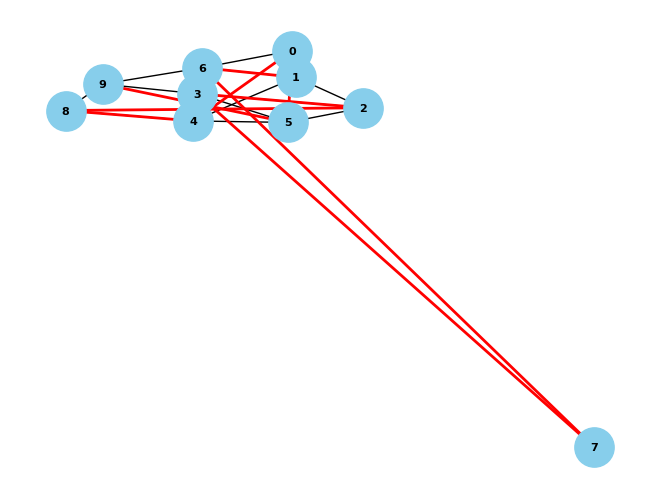

In [2]:
#Particle Swarm Optimization Algorithm
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with 10 nodes and make sure node 1 and 9 are not directly connected
G = nx.erdos_renyi_graph(10, 0.3)
while 9 in G.neighbors(1):
    G = nx.erdos_renyi_graph(10, 0.3)

# Assign random weights to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Display the graph with edge weights
pos = nx.spring_layout(G)

start_node = 1
end_node = 9
#Pso Implemetntation

def calculate_fitness(route):
    total_weight = 0

    # Calculate the total weight (cost) of the given route
    for i in range(len(route) - 1):
        u, v = route[i], route[i + 1]
        if G.has_edge(u, v) and 'weight' in G[u][v]:
            total_weight += G[u][v]['weight']
        
    return total_weight

def update_velocity(particle, p_best_position, g_best_position):
    # Check if 'velocity' key is present in the particle dictionary
    if 'velocity' in particle:
        # PSO velocity update formula
        inertia_term = [alpha * v for v in particle['velocity']]
        cognitive_term = [beta1 * random.random() * (bp - p) for bp, p in zip(p_best_position['position'], particle['position'])]
        social_term = [beta2 * random.random() * (gbp - p) for gbp, p in zip(g_best_position['position'], particle['position'])]

        new_velocity = [int(round(v)) for v in map(sum, zip(inertia_term, cognitive_term, social_term))]
        return new_velocity
    else:
        # Handle the case where 'velocity' key is not present
        print("Error: 'velocity' key not present in the particle dictionary")
        return [0] * len(p_best_position['position'])  # or return some default value


def update_position(current_position, velocity):
    new_position = [int(round(curr + vel)) for curr, vel in zip(current_position, velocity)]
    return new_position

# Particle Swarm Optimization (PSO) parameters
num_particles = 5
num_iterations = 10
alpha = 0.5  # Inertia weight
beta1 = 1.5  # Personal best weight
beta2 = 1.5  # Global best weight

# Initialize particles
particles = []
for _ in range(num_particles):
    particle = {'position': random.sample(range(10), 10)}
    particles.append(particle)

# Initialize personal best positions
p_best_positions = particles.copy()

# Initialize global best position
g_best_position = min(p_best_positions, key=lambda x: calculate_fitness(x['position']))

# PSO main loop

for iteration in range(num_iterations):
    print(f'\nIteration {iteration + 1}')

    for i, particle in enumerate(particles):
        # Update particle's velocity and position
        velocity = update_velocity(particle, p_best_positions[i], g_best_position)
        particle['position'] = update_position(particle['position'], velocity)

        # Ensure that the node indices are within bounds
        particle['position'] = [min(max(node, 0), len(G.nodes) - 1) for node in particle['position']]

        # Update personal best position
        if calculate_fitness(particle['position']) < calculate_fitness(p_best_positions[i]['position']):
            p_best_positions[i] = particle.copy()

        # Update global best position
        if calculate_fitness(p_best_positions[i]['position']) < calculate_fitness(g_best_position['position']):
            g_best_position = p_best_positions[i].copy()

        # Show current particle's position
        print(f'Particle {i + 1}: {particle["position"]} - Fitness: {calculate_fitness(particle["position"])}')

    # Show personal best positions
    print('Personal Best Positions:', [p['position'] for p in p_best_positions])


# Plot the final optimal route
optimal_route = [start_node] + g_best_position['position'] + [end_node]

# Remove start and end nodes from the middle of the route
optimal_route = [optimal_route[0]] + [node for node in optimal_route[1:-1] if node not in [start_node, end_node]] + [optimal_route[-1]]

# Show the final optimal route
print('\nFinal Optimal Route:', optimal_route)

# Plot the final optimal route
optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2)

plt.show()